Прочитайте csv файл (используйте функцию read_csv) Выведите первый пять строчек (используется функцию head) Выведите размеры датасета (используйте атрибут shape) Ответ: О скольки книгах хранит данные датасет?

In [5]:
import pandas as pd

In [6]:
file = '/content/bestsellers with categories.csv'
df_data = pd.read_csv(file)
df_data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [7]:
df_data.shape

(550, 7)

Відповідь:  550 книг

In [8]:
df_data.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df_data.head()


,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


# Первичное исследование данных

Проверьте у всех ли строк хватает данных: выведите количество пропусков (na) в каждом из столбцов (используйте функции isna и sum) Ответ: Есть ли в каких либо переменных пропуски? (Да/Нет)

In [9]:
df_data.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

ВІдповідь: Ні

Проверьте, какие есть уникальные значения в колонке genre (используйте функцию unique) Ответ: Какие есть уникальные жанры?

In [10]:
unique_g = df_data['genre'].unique()
unique_g

array(['Non Fiction', 'Fiction'], dtype=object)

Відповідь: 'Non Fiction', 'Fiction'

Теперь посмотрите на распределение цен: постройте диаграмму (используйте kind='hist') Определите, какая цена у нас максимальная, минимальная, средняя, медианная (используйте функции max, min, mean, median) Ответ: Mаксимальная цена? Ответ: Минимальная цена? Ответ: Средняя цена? Ответ: Медианная цена?

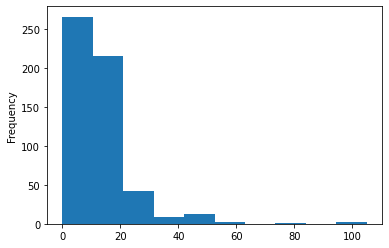

In [11]:
import matplotlib.pyplot as plt
df_data['price'].plot(kind='hist')
plt.show()

In [15]:
max_price = df_data['price'].max()
min_price = df_data['price'].min()
mean_price = df_data['price'].mean()
median_price = df_data['price'].median()
print(max_price)
print(min_price)
print(mean_price)
print(median_price)

105
0
13.1
11.0


# Поиск и сортировка данных

Вопрос: Какой рейтинг в датасете наивысший?

In [16]:
print(df_data['user_rating'].max())

4.9


Вопрос: Сколько книг имеют такой рейтинг?

In [17]:
df_data[df_data['user_rating'] == df_data['user_rating'].max()].shape

(52, 7)

Вопрос: У какой книги больше всего отзывов?

In [18]:
print(df_data[df_data['reviews'] == df_data['reviews'].max()])

                        name       author  user_rating  reviews  price  year  \
534  Where the Crawdads Sing  Delia Owens          4.8    87841     15  2019   

       genre  
534  Fiction  


Вопрос: Из тех книг, что попали в Топ-50 в 2015 году, какая книга самая дорогая (можно использовать промежуточный датафрейм)?

In [19]:
top_50_2015 = df_data[df_data['year'] == 2015]
print(top_50_2015[top_50_2015['price'] == top_50_2015['price'].max()])

                                                  name  \
277  Publication Manual of the American Psychologic...   

                                 author  user_rating  reviews  price  year  \
277  American Psychological Association          4.5     8580     46  2015   

           genre  
277  Non Fiction  


Вопрос: Сколько книг жанра Fiction попали в Топ-50 в 2010 году (используйте &)?

In [20]:
df_data[(df_data['year']==2010) & (df_data['genre']=='Fiction')].count()

name           20
author         20
user_rating    20
reviews        20
price          20
year           20
genre          20
dtype: int64

Вопрос: Сколько книг c рейтингом 4.9 попало в рейтинг в 2010 и 2011 годах (используйте | или функцию isin)?

In [21]:
top_10_11 = df_data[((df_data['year']==2010) | (df_data['year']==2011)) & (df_data['user_rating']==4.9)]
top_10_11

,name,author,user_rating,reviews,price,year,genre
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction


И напоследок, давайте отсортируем по возрастанию цены все книги, которые попали в рейтинг в 2015 году и стоят дешевле 8 долларов (используйте функцию sort_values). Вопрос: Какая книга последняя в отсортированном списке?

In [22]:
top_50_2015[top_50_2015['price'] < 8].sort_values('price')

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


# Агрегирование данных и соединения таблиц

Для начала давайте посмотрим на максимальную и минимальную цены для каждого из жанров (используйте функции groupby и agg, для подсчета минимальных и максимальных значений используйте max и min). Не берите все столбцы, виберете только нужные вам Ответ: Максимальная цена для жанра Fiction: Ответ: 82 Ответ: Минимальная цена для жанра Fiction: Ответ: 0 Ответ: Максимальная цена для жанра Non Fiction: Ответ: 105 Ответ: Минимальная цена для жанра Non Fiction: Ответ: 0

In [23]:
df_data.groupby(['genre'])['price'].agg(['min', 'max'])

,min,max
genre,,
Fiction,0,82
Non Fiction,0,105


Теперь создайте новый датафрейм, который будет вмещать в себя количество книг для каждого из авторов (используйте функции groupby и agg, для подсчета количества используйте count). Не берите все столбцы, виберете только нужные

In [24]:
authors = df_data.groupby(['author'])['name'].count().sort_values()
# authors.sort_values('count')
authors

author
Jill Twiss                             1
Patrick Thorpe                         1
Ian K. Smith M.D.                      1
Howard Stern                           1
Hopscotch Girls                        1
                                      ..
American Psychological Association    10
Suzanne Collins                       11
Gary Chapman                          11
Rick Riordan                          11
Jeff Kinney                           12
Name: name, Length: 248, dtype: int64

Вопрос: Какой размерности вышла таблица? Ответ: 248

Вопрос: У какого автора больше всего книг? Ответ: Jeff Kinney

Вопрос: Сколько книг у этого автора? Ответ: 12



Теперь создайте второй датафрейм, который будет вмещать средний рейтинг для каждого автора (используйте функции groupby и agg, для подсчета среднего значения используйте mean). Не берите все столбцы, виберете только нужные

In [25]:
rates = df_data.groupby(['author'])['user_rating'].mean().sort_values()
rates

author
Donna Tartt           3.9
Gillian Flynn         4.0
Muriel Barbery        4.0
Gallup                4.0
Ian K. Smith M.D.     4.1
                     ... 
Lin-Manuel Miranda    4.9
Patrick Thorpe        4.9
Nathan W. Pyle        4.9
Bill Martin Jr.       4.9
Jill Twiss            4.9
Name: user_rating, Length: 248, dtype: float64

Вопрос: У какого автора средний рейтинг минимальный? Ответ: Donna Tartt

Вопрос: Какой у этого автора средний рейтинг? Ответ: 3.9

Соедините последние два датафрейма так, чтобы для каждого автора было видно количество книг и средний рейтинг (Используйте функцию concat с параметром axis=1). Сохраните результат в переменную Отсортируйте датафрейм по возрастающему количеству книг и возрастающему рейтингу (используйте функцию sort_values)

In [26]:

author_info = pd.concat([authors, rates], axis=1).sort_values(by=['name', 'user_rating'])
author_info

,name,user_rating
author,,
Muriel Barbery,1,4.000000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Chris Cleave,1,4.100000
Geneen Roth,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


Вопрос: Какой автор первый в списке? Ответ: Muriel Barbery